<a href="https://colab.research.google.com/github/weisses1/swcolabfiles/blob/main/TimeSeriesLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import holidays
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import numpy as np

In [2]:
path = r'https://raw.githubusercontent.com/ncrowder/python/refs/heads/main/timeseries_full.csv'
df = pd.read_csv(path, parse_dates= ['date']) #parse_dates actually brings it in as Date/Time
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,customers,coffee_sold,avg_sale,total_sales
0,2021-01-01,104,78,4.80,499.20
1,2021-01-02,118,97,4.78,564.04
2,2021-01-03,116,93,4.81,557.96
3,2021-01-04,102,71,4.77,486.54
4,2021-01-05,101,71,4.82,486.82


In [3]:
df = df.set_index('date')

1.Remove the date(s) when the business was closed ($0 sales) from the dataset.


In [4]:
df = df[df['total_sales'] != 0.00]
df

,customers,coffee_sold,avg_sale,total_sales
date,,,,
2021-01-01,104,78,4.80,499.20
2021-01-02,118,97,4.78,564.04
2021-01-03,116,93,4.81,557.96
2021-01-04,102,71,4.77,486.54
2021-01-05,101,71,4.82,486.82
...,...,...,...,...
2021-12-26,123,99,4.79,589.17
2021-12-27,109,76,4.80,523.20
2021-12-28,111,79,4.80,532.80


2. Rerun the EWA forecast using an value of .15. Show the plot of the original total_sales
along with the forecast, and then calculate the error/variance in total_sales and forecasted
value for August 13

In [5]:
df["EWMA_0.15"] = df["total_sales"].ewm(alpha=0.15).mean()

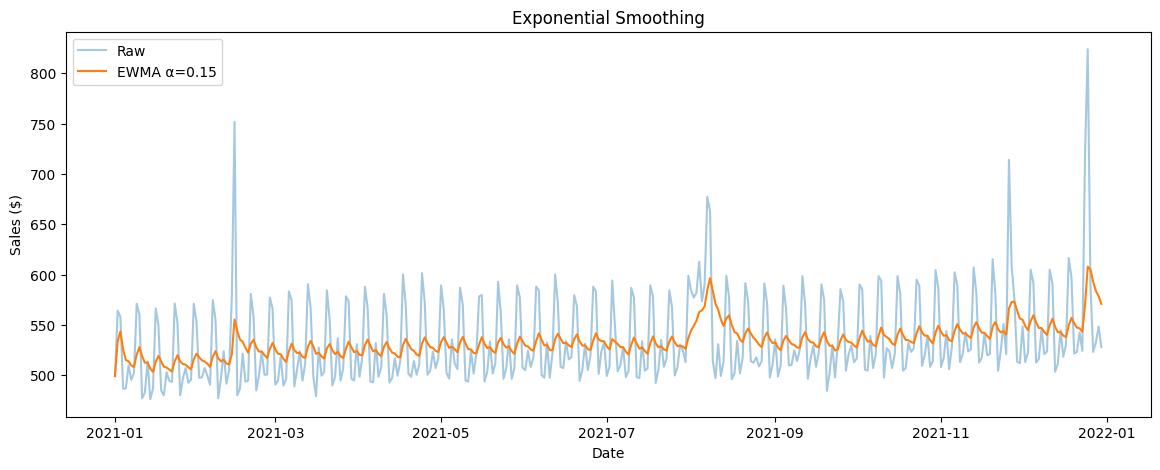

In [6]:
plt.figure(figsize=(14,5))
plt.plot(df["total_sales"], alpha=0.4, label="Raw")
plt.plot(df["EWMA_0.15"], label="EWMA α=0.15")
plt.title("Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.legend()
plt.show()

In [7]:
errors = df["total_sales"] - df["EWMA_0.15"]

errors_aug_13 = errors.loc['2021-08-13']

MAE  = errors.abs().mean() #mean absolute error- how far off we are, positive
MAPE = (errors.abs() / df["total_sales"]).replace([np.inf,np.nan],0).mean() * 100 #mean absolute percentage error
RMSE = np.sqrt((errors**2).mean()) #root mean square error
Bias = errors.mean() #are we generally overshooting or undershooting? - if bias is 0, then we are doing neither

print(MAE, MAPE, RMSE, Bias)

29.084477478894904 5.2828863931732455 37.6424491891253 0.8166810337449012


3. Create a 7 day moving average forecast that uses a median as opposed to a mean. Call it
“pred_roll_med” and call the original one that uses the mean “pred_roll_mean.” Plot these
along with the actual total_sales values, and then calculate the differences between actuals
and predictions (both types) for September 17.


In [8]:
df['pred_roll_mean'] = df['total_sales'].rolling(window=7).mean()
df['pred_roll_med'] = df['total_sales'].rolling(window=7).median()

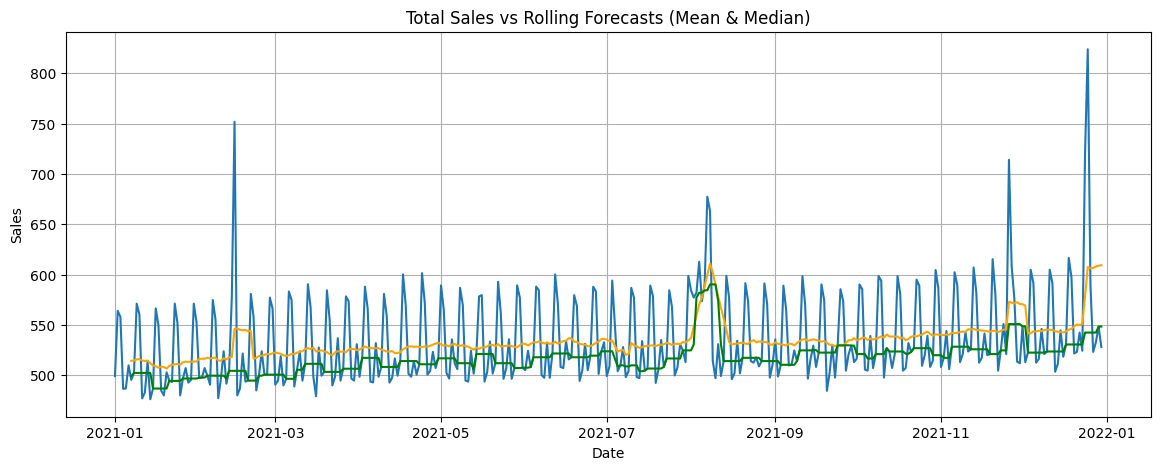

In [9]:
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['total_sales'])
plt.plot(df.index, df['pred_roll_mean'], color='orange')
plt.plot(df.index, df['pred_roll_med'], color='green')
plt.title('Total Sales vs Rolling Forecasts (Mean & Median)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [10]:
sep_17 = df.loc['2021-09-17']
actual = sep_17['total_sales']
mean_forecast = sep_17['pred_roll_mean']
median_forecast = sep_17['pred_roll_med']

mean_diff = actual - mean_forecast
median_diff = actual - median_forecast

In [11]:
actual

np.float64(522.5)

In [12]:
mean_forecast

np.float64(534.5157142857142)

In [13]:
median_forecast

np.float64(522.5)

In [14]:
mean_diff

np.float64(-12.015714285714239)

In [15]:
median_diff

np.float64(0.0)

4. Use one of the other columns (besides average_sales) in the dataset to calculate a two-week
rolling average forecast and an EWA forecast using an alpha value of 10%. Show a plot of all
three, appropriately labeled.


In [16]:
df['customers_roll'] = df['customers'].rolling(window=14).mean()
df['ewma_cust'] = df['customers'].ewm(alpha=0.1).mean()

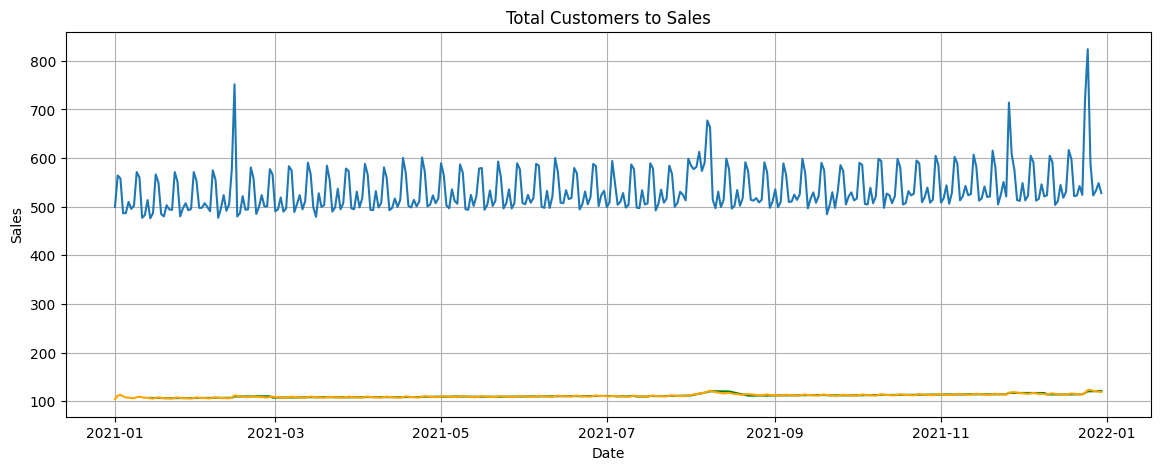

In [17]:
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['total_sales'])
plt.plot(df.index, df['customers_roll'], color='green')
plt.plot(df.index, df['ewma_cust'], color='orange')
plt.title('Total Customers to Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

5. How much better or worse is the MAPE for an EWA using an of .25 vs .10?

In [18]:
df["EWMA_0.1"] = df["total_sales"].ewm(alpha=0.1).mean()

errors = df["total_sales"] - df["EWMA_0.1"]

MAE_1  = errors.abs().mean() #mean absolute error- how far off we are, positive
MAPE_1= (errors.abs() / df["total_sales"]).replace([np.inf,np.nan],0).mean() * 100 #mean absolute percentage error
RMSE_1 = np.sqrt((errors**2).mean()) #root mean square error
Bias_1 = errors.mean() #are we generally overshooting or undershooting? - if bias is 0, then we are doing neither

print(MAE_1, MAPE_1, RMSE_1, Bias_1)

30.39528894791668 5.512017732074179 39.27332369856033 1.2860391793813533


In [19]:
df["EWMA_0.25"] = df["total_sales"].ewm(alpha=0.25).mean()

errors = df["total_sales"] - df["EWMA_0.25"]

MAE_25  = errors.abs().mean() #mean absolute error- how far off we are, positive
MAPE_25 = (errors.abs() / df["total_sales"]).replace([np.inf,np.nan],0).mean() * 100 #mean absolute percentage error
RMSE_25 = np.sqrt((errors**2).mean()) #root mean square error
Bias_25 = errors.mean() #are we generally overshooting or undershooting? - if bias is 0, then we are doing neither

print(MAE_25, MAPE_25, RMSE_25, Bias_25)

26.10777625765263 4.752626532198199 34.16732955056376 0.37264983151547965


In [20]:
MAPE_25-MAPE_1

np.float64(-0.7593911998759806)

6. Resample with freq = “ME” and use a sum on the ‘total_sales’ column. This will produce a
series you can call dfmonth. Which month had the least sales? Show a line plot or bar plot.

In [21]:
dfmonth = df["total_sales"].resample("ME").sum()

In [22]:
dfmonth

,total_sales
date,
2021-01-31,15960.57
2021-02-28,14713.72
2021-03-31,16179.02
2021-04-30,15777.59
2021-05-31,16472.81
2021-06-30,15964.00
2021-07-31,15902.57
2021-08-31,17046.04
2021-09-30,15961.92


Text(0, 0.5, 'Total Sales')

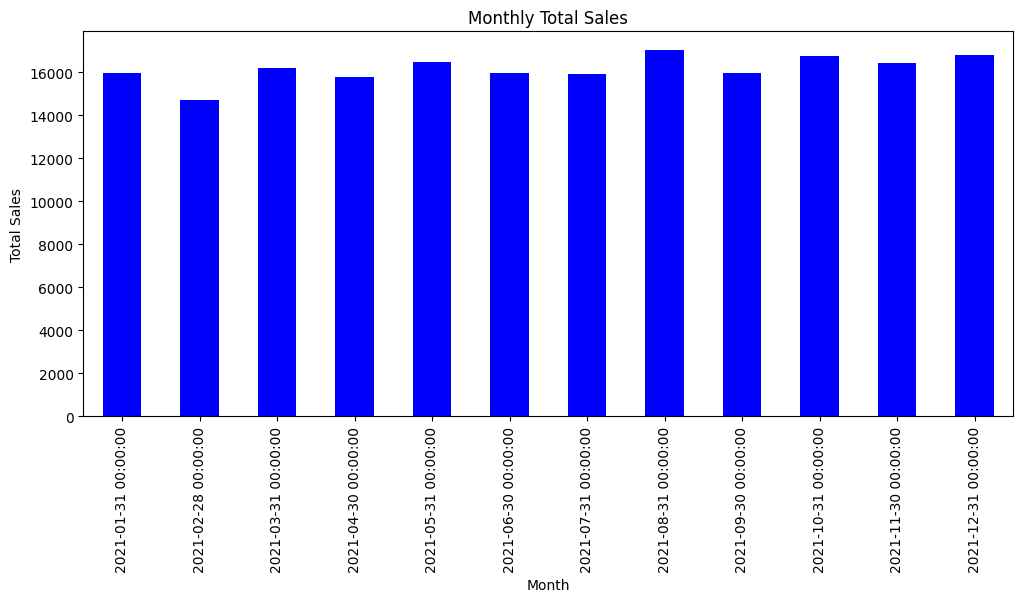

In [23]:
plt.figure(figsize=(12, 5))
dfmonth.plot(kind='bar', color='blue')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')

#February had least sales


 7. Add a “cum_range” column to the series from #6 using two other cumulative functions
(there is no built-in cumrange). *Hint: If you try to create it directly (dfmonth[‘cum_range’] = )
python complains because you can’t add a column to a series. First convert the series to a
dataframe using the .to_frame() method and then try again. Then plot the result.

In [24]:
dfmonth_df = dfmonth.to_frame()
dfmonth_df

,total_sales
date,
2021-01-31,15960.57
2021-02-28,14713.72
2021-03-31,16179.02
2021-04-30,15777.59
2021-05-31,16472.81
2021-06-30,15964.00
2021-07-31,15902.57
2021-08-31,17046.04
2021-09-30,15961.92


In [25]:
dfmonth_df['total_sales'].cummax()

,total_sales
date,
2021-01-31,15960.57
2021-02-28,15960.57
2021-03-31,16179.02
2021-04-30,16179.02
2021-05-31,16472.81
2021-06-30,16472.81
2021-07-31,16472.81
2021-08-31,17046.04
2021-09-30,17046.04


In [26]:
dfmonth_df['cum_range'] =dfmonth_df['total_sales'].cummax()-dfmonth_df['total_sales'].cummin()
dfmonth_df

,total_sales,cum_range
date,,
2021-01-31,15960.57,0.00
2021-02-28,14713.72,1246.85
2021-03-31,16179.02,1465.30
2021-04-30,15777.59,1465.30
2021-05-31,16472.81,1759.09
2021-06-30,15964.00,1759.09
2021-07-31,15902.57,1759.09
2021-08-31,17046.04,2332.32
2021-09-30,15961.92,2332.32


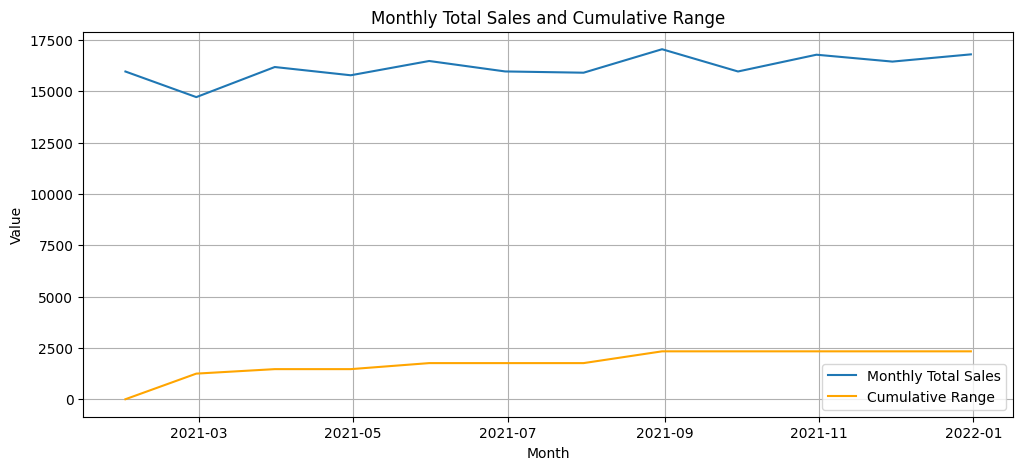

In [27]:
plt.figure(figsize=(12, 5))
plt.plot(dfmonth_df.index, dfmonth_df['total_sales'], label='Monthly Total Sales')
plt.plot(dfmonth_df.index, dfmonth_df['cum_range'], label='Cumulative Range', color='orange')
plt.title('Monthly Total Sales and Cumulative Range')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)


8. Combine the original data (before adding all the new columns and predictions) with the data
found here, using an appropriate method of your choosing. Rework #2 using this fuller
dataset.


In [28]:
def append_new_timeseries(existing_df, new_df, date_col="date"):
    # Parse date column into datetime
    if new_df[date_col].dtype != "datetime64[ns]":
        new_df[date_col] = pd.to_datetime(new_df[date_col], infer_datetime_format=True, errors="coerce")

    # Identify rows with invalid date parsing
    bad_dates = new_df[new_df[date_col].isna()]
    if len(bad_dates) > 0:
        print(f"\nWARNING: {len(bad_dates)} rows had unparseable dates and were dropped:")
        print(bad_dates)
        new_df = new_df.dropna(subset=[date_col])

    # Set datetime index
    new_df = new_df.set_index(date_col)

    # Align columns to existing dataset
    needed_cols = existing_df.columns
    new_cols = new_df.columns

    missing_cols = set(needed_cols) - set(new_cols)
    extra_cols = set(new_cols) - set(needed_cols)

    if missing_cols:
        print(f"\nMissing columns in new data (filled with NaN): {missing_cols}")
        for col in missing_cols:
            new_df[col] = pd.NA

    if extra_cols:
        print(f"\nExtra columns in new data (dropped): {extra_cols}")

    new_df = new_df.reindex(columns=needed_cols)

    # Track timestamps BEFORE appending
    existing_dates = set(existing_df.index)
    new_dates = set(new_df.index)

    overlapping_dates = existing_dates.intersection(new_dates)
    new_only_dates = new_dates - existing_dates

    # Append
    combined = pd.concat([existing_df, new_df])

    # Sort chronologically
    combined = combined.sort_index()

    # Remove duplicate timestamps (keep newest rows)
    duplicate_mask = combined.index.duplicated(keep="last")
    duplicate_dates_removed = combined.index[duplicate_mask]

    if len(duplicate_dates_removed) > 0:
        print(f"\nDuplicate timestamps replaced (kept last version):")
        print(list(duplicate_dates_removed))

    combined = combined[~duplicate_mask]

    # Diagnostics
    print("\n=== Append Summary ===")
    print(f"Rows in existing dataset: {len(existing_df)}")
    print(f"Rows in new dataset: {len(new_df)}")
    print(f"New unique dates added: {len(new_only_dates)}")
    print(f"Dates overwritten (duplicates updated): {len(overlapping_dates)}")

    if len(new_only_dates) > 0:
        print("\nDates added:")
        print(sorted(list(new_only_dates))[:10], "...")  # preview

    if len(overlapping_dates) > 0:
        print("\nDates overwritten:")
        print(sorted(list(overlapping_dates))[:10], "...")  # preview

    print("\nFinal combined row count:", len(combined))
    print("=== Append Complete ===\n")

    return combined

In [29]:
path_1 = r'https://raw.githubusercontent.com/ncrowder/python/refs/heads/main/dec2021_jan2022_adjusted.csv'
df_1 = pd.read_csv(path_1)#, parse_dates= ['date']) #parse_dates actually brings it in as Date/Time

In [30]:
#df_1 = df_1.set_index('date')

In [31]:
df.drop(columns=['EWMA_0.15','pred_roll_mean', 'pred_roll_med', 'customers_roll', 'ewma_cust',
       'EWMA_0.1', 'EWMA_0.25'], inplace=True)

In [32]:
df

,customers,coffee_sold,avg_sale,total_sales
date,,,,
2021-01-01,104,78,4.80,499.20
2021-01-02,118,97,4.78,564.04
2021-01-03,116,93,4.81,557.96
2021-01-04,102,71,4.77,486.54
2021-01-05,101,71,4.82,486.82
...,...,...,...,...
2021-12-26,123,99,4.79,589.17
2021-12-27,109,76,4.80,523.20
2021-12-28,111,79,4.80,532.80


In [33]:
df_1

,date,customers,coffee_sold,avg_sale,total_sales
0,12/1/2021,115,84,4.77,548.55
1,12/2/2021,112,79,4.75,532.00
2,12/3/2021,110,84,4.75,522.50
3,12/4/2021,126,102,4.80,604.80
4,12/5/2021,124,97,4.77,591.48
...,...,...,...,...,...
57,1/27/2022,113,80,4.81,543.53
58,1/28/2022,113,85,4.84,546.92
59,1/29/2022,134,110,4.86,651.24
60,1/30/2022,125,100,4.84,605.00


In [34]:
new_df = append_new_timeseries(df, df_1,date_col="date")


Duplicate timestamps replaced (kept last version):
[Timestamp('2021-12-01 00:00:00'), Timestamp('2021-12-02 00:00:00'), Timestamp('2021-12-03 00:00:00'), Timestamp('2021-12-04 00:00:00'), Timestamp('2021-12-05 00:00:00'), Timestamp('2021-12-06 00:00:00'), Timestamp('2021-12-07 00:00:00'), Timestamp('2021-12-08 00:00:00'), Timestamp('2021-12-09 00:00:00'), Timestamp('2021-12-10 00:00:00'), Timestamp('2021-12-11 00:00:00'), Timestamp('2021-12-12 00:00:00'), Timestamp('2021-12-13 00:00:00'), Timestamp('2021-12-14 00:00:00'), Timestamp('2021-12-15 00:00:00'), Timestamp('2021-12-16 00:00:00'), Timestamp('2021-12-17 00:00:00'), Timestamp('2021-12-18 00:00:00'), Timestamp('2021-12-19 00:00:00'), Timestamp('2021-12-20 00:00:00'), Timestamp('2021-12-21 00:00:00'), Timestamp('2021-12-22 00:00:00'), Timestamp('2021-12-23 00:00:00'), Timestamp('2021-12-24 00:00:00'), Timestamp('2021-12-25 00:00:00'), Timestamp('2021-12-26 00:00:00'), Timestamp('2021-12-27 00:00:00'), Timestamp('2021-12-28 00:00:0

/tmp/ipython-input-765114340.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  new_df[date_col] = pd.to_datetime(new_df[date_col], infer_datetime_format=True, errors="coerce")


Rerun the EWA forecast using an value of .15. Show the plot of the original total_sales
along with the forecast, and then calculate the error/variance in total_sales and forecasted
value for August 13

In [36]:
new_df["EWMA_0.15"] = new_df["total_sales"].ewm(alpha=0.15).mean()

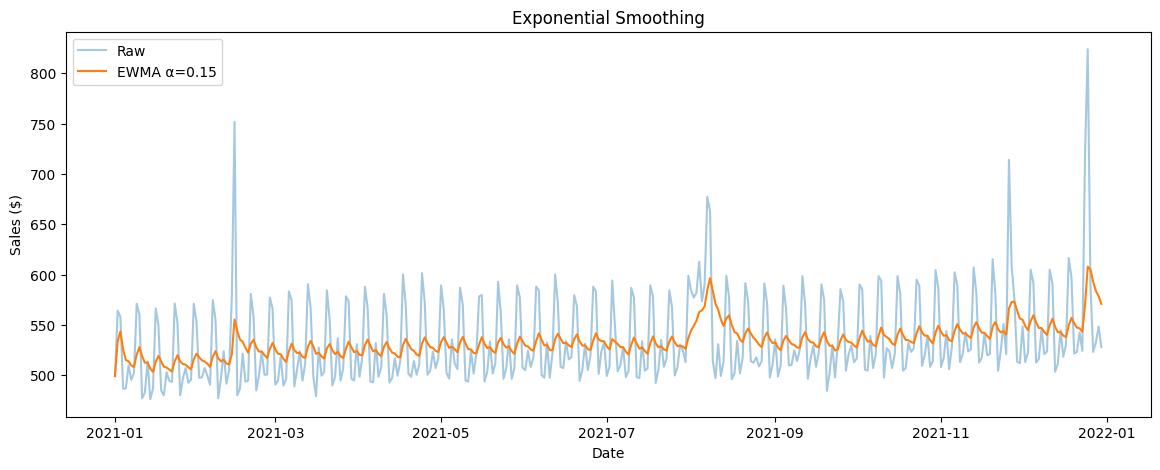

In [37]:
plt.figure(figsize=(14,5))
plt.plot(df["total_sales"], alpha=0.4, label="Raw")
plt.plot(df["EWMA_0.15"], label="EWMA α=0.15")
plt.title("Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.legend()
plt.show()

In [38]:
new_errors = new_df["total_sales"] - new_df["EWMA_0.15"]

new_errors_aug_13 = errors.loc['2021-08-13']

MAE  = new_errors.abs().mean() #mean absolute error- how far off we are, positive
MAPE = (new_errors.abs() / df["total_sales"]).replace([np.inf,np.nan],0).mean() * 100 #mean absolute percentage error
RMSE = np.sqrt((new_errors**2).mean()) #root mean square error
Bias = new_errors.mean() #are we generally overshooting or undershooting? - if bias is 0, then we are doing neither

print(MAE, MAPE, RMSE, Bias)

30.165738767656144 4.834199767779415 45.03069317784055 0.7124838836693339
